In [1]:
KAGGLE_UPLOAD = False

if KAGGLE_UPLOAD:
    # /content/ 폴더에 kaggle.json을 업로드 (매번 colab노트북 생성시 반복)
    from google.colab import files
    files.upload()
else:
    kaggle_username = 'ventureparker'
    from google.colab import userdata
    kaggle_key = userdata.get(kaggle_username)

In [2]:
import json
import os

def create_kaggle_json(username, key, file_path):
    # 데이터 생성
    kaggle_data = {
        "username": username,
        "key": key
    }

    # JSON 파일로 저장
    with open(file_path, 'w') as json_file:
        json.dump(kaggle_data, json_file)

    print(f"kaggle.json 파일이 '{os.path.abspath(file_path)}' 경로에 생성되었습니다.")



# kaggle.json 파일 생성 함수 호출
if KAGGLE_UPLOAD==False:
    # 사용자 정보 입력
    key = kaggle_key  # 여기에 key값을 입력하세요
    filename = 'kaggle.json'
    create_kaggle_json(kaggle_username, key, filename)

kaggle.json 파일이 '/content/kaggle.json' 경로에 생성되었습니다.


In [4]:
import os
import shutil

os.makedirs('/root/.kaggle', exist_ok=True)
path = os.getcwd()

# 파일을 복사하는데, 이미 복사된 경우 복사하지 않는다.
if not os.path.exists(os.path.join('/root/.kaggle','kaggle.json')):
    src = os.path.join(path,'kaggle.json')
    dst = os.path.join('/root/.kaggle', 'kaggle.json')
    shutil.copy(src,dst)
    print('파일 복사 완료')

파일 복사 완료


In [5]:
# 복사된 파일 확인
!ls -al /root/.kaggle

total 16
drwxr-xr-x 2 root root 4096 Sep 30 09:54 .
drwx------ 1 root root 4096 Sep 30 09:54 ..
-rw-r--r-- 1 root root   72 Sep 30 09:54 kaggle.json


In [6]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:08<00:00, 64.7MB/s]
100% 812M/812M [00:08<00:00, 100MB/s] 


In [8]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [9]:
# 구글 드라이브 마운트 하지 않고, 구글 드라이브 파일 다운로드 받기
# import gdown
# gdown.download(id='1TAXL6bbZf-ro36hlu4KnKmwxUR4DrBno', output='requirements.txt')

In [10]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [7]:
# 압축파일 풀기 :하위 폴더 data에 풀기
!unzip -qq dogs-vs-cats.zip -d data

In [8]:
!ls data/

sampleSubmission.csv  test1.zip  train.zip


In [9]:
import zipfile

data = os.path.join(path,'data')
train_data = os.path.join(data,'train')
test_data = os.path.join(data,'test1')

zip_file = zipfile.ZipFile(os.path.join(data,'train.zip'))
zip_file.extractall(path=data)
zip_file.close()

zip_file = zipfile.ZipFile(os.path.join(data,'test1.zip'))
zip_file.extractall(path=data)
zip_file.close()

In [10]:
# !rm -rf data/train/train
# !rm -rf data/test1/test1

In [11]:
# 데이터의 갯수
trainFiles = os.listdir(train_data)
testFiles = os.listdir(test_data)
# train : 12500개 cat, 12500개 dog
print(len(trainFiles))
# test : 레이블이 없는 이미지 12500개
print(len(testFiles))

25000
12500


In [12]:
import random
num = random.randint(0,len(trainFiles))
trainFiles[num]

'dog.2793.jpg'

In [13]:
# cat : 12500, dog : 12500 갯수 확인하기
trainFiles[0].split('.')[0]

'cat'

In [14]:
# 이미지 분류 레이블을 만드는 방법
# 방법 1은 폴더로 클래스를 나누는 방법 : 폴더명을 레이블로 사용하는 방법
# 방법 2는 csv파일을 만든다. csv파일의 컬럼 2개 (column1 : 파일명, column2 : 레이블)

# 훈련 데이터 전체 25000장, 이거 다쓰면... 오늘 진도 못나가요...
# 연습시에는 데이터 4000장만 사용(고양이 2000장, 강아지 2000장)
# train : 1000장,1000장, valid : 500장, 500장, test : 500장, 500장

In [56]:
# 스몰 데이터셋 폴더 삭제
!rm -rf sdata

In [57]:
# small데이터셋을 위한 폴더를 지정하고 4000장을 나눠서 보관

sdata = 'sdata'
tain_sdata = os.path.join(sdata,'train')
valid_sdata = os.path.join(sdata,'valid')
test_sdata = os.path.join(sdata,'test')

os.makedirs(tain_sdata, exist_ok=True)
os.makedirs(valid_sdata, exist_ok=True)
os.makedirs(test_sdata, exist_ok=True)

train_sdata_dog = os.path.join(tain_sdata,'dog')
train_sdata_cat = os.path.join(tain_sdata,'cat')
os.makedirs(train_sdata_dog, exist_ok=True)
os.makedirs(train_sdata_cat, exist_ok=True)

valid_sdata_dog = os.path.join(valid_sdata,'dog')
valid_sdata_cat = os.path.join(valid_sdata,'cat')
os.makedirs(valid_sdata_dog, exist_ok=True)
os.makedirs(valid_sdata_cat, exist_ok=True)

test_sdata_dog = os.path.join(test_sdata,'dog')
test_sdata_cat = os.path.join(test_sdata,'cat')
os.makedirs(test_sdata_dog, exist_ok=True)
os.makedirs(test_sdata_cat, exist_ok=True)

In [58]:
# 한 클래스의 이미지 갯수 * 2
train_num = 1000
valid_num = 500
test_num  = 500

train_range = [0, train_num-1]
valid_range = [train_num, train_num + valid_num -1]
test_range  = [train_num + valid_num, train_num + valid_num + test_num-1]

print(train_range)
print(valid_range)
print(test_range)

[0, 999]
[1000, 1499]
[1500, 1999]


In [59]:
import os
import shutil

# 데이터셋 디렉토리 경로 설정 (데이터셋이 저장된 경로로 수정하세요)
dataset_dir = 'data/train'

# 새로운 train, valid, test 디렉토리 생성 경로
base_dir = 'sdata'

# 클래스 목록
classes = ['dog', 'cat']

# 폴더 경로 생성
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# 폴더 생성 함수
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# train, valid, test 폴더 및 각각의 클래스 폴더 생성
for cls in classes:
    create_dir(os.path.join(train_dir, cls))
    create_dir(os.path.join(valid_dir, cls))

# 이미지 복사 함수
def copy_images(start_idx, end_idx, src_dir, dst_dir, label):
    for i in range(start_idx, end_idx + 1):
        file_name = f'{label}.{i}.jpg'
        src_path = os.path.join(src_dir, file_name)
        dst_path = os.path.join(dst_dir, file_name)
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)

# 클래스별로 train, valid, test 데이터셋 구성
for cls in classes:
    # train dataset 구성 (0~999)
    copy_images(train_range[0], train_range[1], dataset_dir, os.path.join(train_dir, cls), cls)

    # valid dataset 구성 (1000~1249)
    copy_images(valid_range[0], valid_range[1], dataset_dir, os.path.join(valid_dir, cls), cls)

    # test dataset 구성 (1250~1499)
    copy_images(test_range[0], test_range[1], dataset_dir, os.path.join(test_dir, cls), cls)

print("데이터셋 분할 및 복사가 완료되었습니다.")

데이터셋 분할 및 복사가 완료되었습니다.


In [60]:
dirList = [train_sdata_dog, train_sdata_cat, valid_sdata_dog, valid_sdata_cat, test_sdata_dog,test_sdata_cat]

for dir in dirList:
    print(len(os.listdir(dir)))

1000
1000
500
500
500
500


In [61]:
# 위에서 복사된 파일들 갯수 확인하기
train_cat = os.listdir(os.path.join(train_dir,'cat'))
train_dog = os.listdir(os.path.join(train_dir,'dog'))
valid_cat = os.listdir(os.path.join(valid_dir,'cat'))
valid_dog = os.listdir(os.path.join(valid_dir,'dog'))
test_cat = os.listdir(os.path.join(test_dir,'cat'))
test_dog = os.listdir(os.path.join(test_dir,'dog'))

#위의 6개 폴더 파일 갯수 확인하기
print(len(train_cat),len(train_dog),len(valid_cat),len(valid_dog),len(test_cat),len(test_dog))

1000 1000 500 500 500 500


In [21]:
testFiles[0]

'10938.jpg'

array([[[ 68,  72,  73],
        [ 41,  45,  46],
        [ 34,  38,  39],
        ...,
        [ 73,  79,  92],
        [ 71,  81,  91],
        [ 72,  82,  92]],

       [[ 47,  51,  52],
        [ 35,  39,  40],
        [ 40,  44,  45],
        ...,
        [ 72,  80,  93],
        [ 71,  81,  91],
        [ 71,  80,  93]],

       [[ 32,  36,  37],
        [ 45,  49,  50],
        [ 64,  68,  69],
        ...,
        [ 63,  70,  85],
        [ 61,  70,  83],
        [ 61,  70,  84]],

       ...,

       [[ 29,  49,  67],
        [ 20,  40,  58],
        [ 35,  55,  73],
        ...,
        [112, 123, 131],
        [112, 123, 131],
        [112, 123, 131]],

       [[ 26,  46,  64],
        [ 17,  37,  55],
        [ 32,  52,  70],
        ...,
        [112, 122, 132],
        [112, 123, 131],
        [112, 123, 131]],

       [[ 21,  42,  63],
        [ 11,  32,  53],
        [ 27,  48,  69],
        ...,
        [108, 120, 130],
        [108, 121, 129],
        [108, 121, 129]]], dtype=uint8)
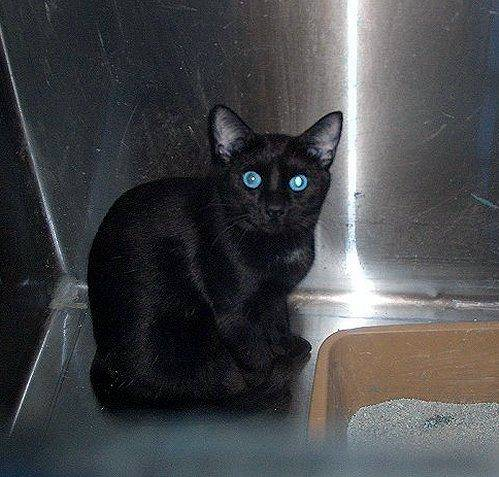

In [22]:
import cv2
img = cv2.imread(os.path.join(os.path.join(train_dir,'cat',train_cat[3])))
img

In [62]:
from torchvision import transforms

org_size =(256,256)
org_size =(224,224)
img_size = 224

visual_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(img_size),
    # 평균이 0.5 표준편차 0.5 (0~1사이의 실수)
    transforms.ToTensor(),
    ])

train_transform = transforms.Compose([
    #이미지 사이즈가 파일마다 제 각각
    transforms.Resize(org_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(img_size),
    # 평균이 0.5 표준편차 0.5 (0~1사이의 실수)
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

test_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [131]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import os

# Custom ImageFolder to return file name along with image and label
class ImageFolderWithFilenames(ImageFolder):
    def __getitem__(self, index):
        # Get the original tuple (image, label)
        original_tuple = super(ImageFolderWithFilenames, self).__getitem__(index)

        # Get the image file path
        path, _ = self.samples[index]
        # Return the image, label, and the file name (path)
        return original_tuple + (path,)

In [132]:
from torchvision.datasets import ImageFolder

data_dir = '/content/sdata'

batch_size = 32

visual_data = ImageFolder(root=f"{data_dir}/train", transform=visual_transform)
train_data = ImageFolder(root=f"{data_dir}/train", transform=train_transform)
valid_data = ImageFolder(root=f"{data_dir}/valid", transform=test_transform)
test_data = ImageFolderWithFilenames(root=f"{data_dir}/test", transform=test_transform)


visual_loader = DataLoader(visual_data, batch_size=batch_size, shuffle=True)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

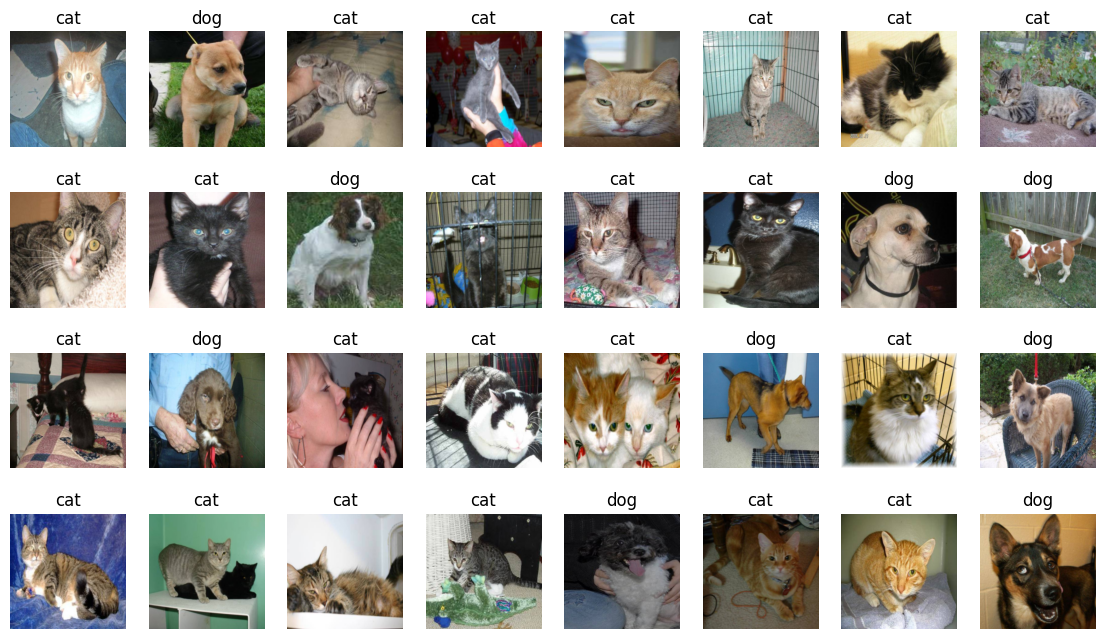

In [70]:
import matplotlib.pyplot as plt

# train데이터가 2000장이 있는데, 32장씩 데이터를 가져온다.
images, labels = next(iter(visual_loader))

classes ={0:'cat',1:'dog'}

fig = plt.figure(figsize=(14, 8))
for i in range(batch_size):
    # 4행 8열
    ax = fig.add_subplot(4, 8, i + 1)
    ax.set_title(classes[labels[i].item()])
    ax.axis('off')
    # 컬러 채널 순서를 재정렬
    ax.imshow(images[i].permute(1, 2, 0))

plt.show()

In [71]:
import torch
from torchvision.models import resnet50, mobilenet_v3_large

isResnet50 = True

device='cuda' if torch.cuda.is_available() else 'cpu'

# ImageNet에 사전학습된 모델을 가져와서 학습(Train)
# 분류기는 제외하고 특징 추출기만 사용

if isResnet50:
    model = resnet50(pretrained=True).to(device)
else:
    model = mobilenet_v3_large(pretrained=True).to(device)

model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [51]:
!nvidia-smi

Mon Sep 30 07:25:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0              31W /  70W |   4177MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [33]:
# !pip install torchsummary
# from torchsummary import summary
# summary(model, (3, 224, 224))

In [72]:
!pip install pytorch-ignite

In [73]:
# EarlyStopping 클래스
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt'):
        """
        Args:
            patience (int): 성능 개선이 없을 때 몇 번의 에포크까지 기다릴지.
            verbose (bool): True일 경우 개선될 때마다 메시지 출력.
            delta (float): 성능 개선으로 간주될 최소 변화량.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):
        score = -val_loss
        # 처음에 호출됐을때는 best_score가 None이라서 초기값을 설정
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        # 지금까지의 best_score와 현재 score를 비교
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            # patience값이 모두 충족했을때, 종료조건이 만족될때
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''검증 손실이 감소하면 모델을 저장합니다.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
            torch.save(model.state_dict(), self.path)  # 모델 상태 저장
        self.val_loss_min = val_loss

# EarlyStopping 인스턴스 생성 (patience=10)
early_stopping = EarlyStopping(patience=10, verbose=True, path='resnet50_best.pth')

In [74]:
model = resnet50(pretrained=True).to(device)

# 특징 추출기는 그대로 사용하고, 분류기만 2개짜리로 변경
# fc -> 분류기 in_features -> 분류기의 입력
num_features = model.fc.in_features

# num_classes: 분류해야 할 클래스 수 (예: 3개의 클래스)
num_classes = 2

# 분류기 부분을 Softmax 활성화 함수로 변경
model.fc = torch.nn.Sequential(
    torch.nn.Linear(num_features, 256),  # 입력에서 256개의 노드로 연결
    torch.nn.ReLU(),                     # 활성화 함수 ReLU
    torch.nn.Linear(256, num_classes)    # 최종 분류 클래스의 수에 맞게 출력 노드 수 설정
).to(device)

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [94]:
import time
from tqdm import tqdm

# 학습 진행
def fit(model, criterion, optimizer, epochs, train_loader, valid_loader, resume=False):

    if resume==False:
        # 그래프로 출력하기 위한 리스트
        train_losses = []
        train_accuracies = []
        valid_losses = []
        valid_accuracies = []

    for epoch in range(epochs):
        start = time.time()

        # 훈련 모드
        model.train()

        train_loss = 0
        train_acc = 0
        train_correct = 0

        for train_x, train_y in tqdm(train_loader):
            train_x, train_y = train_x.to(device), train_y.to(device)
            optimizer.zero_grad()
            outputs = model(train_x)

            # softmax + loss
            loss = criterion(outputs, train_y)

            loss.backward()
            optimizer.step()

            # batch마다 train_loss를 누적
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_correct += (predicted == train_y).sum().item()

        valid_loss = 0
        valid_acc = 0
        valid_correct = 0

        for valid_x, valid_y in valid_loader:
            with torch.no_grad():
                model.eval()
                valid_x, valid_y = valid_x.to(device), valid_y.to(device)
                outputs = model(valid_x)
                loss = criterion(outputs, valid_y)
                valid_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                valid_correct += (predicted == valid_y).sum().item()

        train_acc = train_correct/len(train_loader.dataset)
        valid_acc = valid_correct/len(valid_loader.dataset)

        print(f'{time.time() - start:.3f}sec : [Epoch {epoch+1}/{epochs}] -> train loss: {train_loss/len(train_loader):.4f}, train acc: {train_acc*100:.3f}% / valid loss: {valid_loss/len(valid_loader):.4f}, valid acc: {valid_acc*100:.3f}%')

        train_losses.append(train_loss/len(train_loader))
        train_accuracies.append(train_acc)
        valid_losses.append(valid_loss/len(valid_loader))
        valid_accuracies.append(valid_acc)

        scheduler.step(valid_loss)
        # 현재 learning_rate 값을 읽어올 수 있다.
        now_lr = optimizer.param_groups[0]['lr']
        print(f'learning_rate {epoch+1}: {now_lr:.8f}')

        # EarlyStopping을 호출하여 학습 중단 여부 확인
        early_stopping(valid_loss, model)

        # 학습 중단 조건을 충족하면 break
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break
        print('-' * 100)

    plt.plot(train_losses, label='loss')
    plt.plot(train_accuracies, label='accuracy')
    plt.legend()
    plt.title('train loss and accuracy')
    plt.show()

    plt.plot(valid_losses, label='loss')
    plt.plot(valid_accuracies, label='accuracy')
    plt.legend()
    plt.title('valid loss and accuracy')
    plt.show()


100%|██████████| 63/63 [00:26<00:00,  2.36it/s]


33.157sec : [Epoch 1/25] -> train loss: 0.0101, train acc: 99.800% / valid loss: 0.0261, valid acc: 99.000%
learning_rate 1: 0.00001000
Validation loss decreased (inf --> 0.835716).  Saving model ...
----------------------------------------------------------------------


100%|██████████| 63/63 [00:26<00:00,  2.39it/s]


32.326sec : [Epoch 2/25] -> train loss: 0.0050, train acc: 99.850% / valid loss: 0.0274, valid acc: 99.000%
learning_rate 2: 0.00001000
EarlyStopping counter: 1 out of 10
----------------------------------------------------------------------


100%|██████████| 63/63 [00:28<00:00,  2.22it/s]


34.582sec : [Epoch 3/25] -> train loss: 0.0070, train acc: 99.800% / valid loss: 0.0337, valid acc: 99.000%
learning_rate 3: 0.00001000
EarlyStopping counter: 2 out of 10
----------------------------------------------------------------------


100%|██████████| 63/63 [00:26<00:00,  2.38it/s]


33.000sec : [Epoch 4/25] -> train loss: 0.0037, train acc: 99.950% / valid loss: 0.0273, valid acc: 99.000%
learning_rate 4: 0.00001000
EarlyStopping counter: 3 out of 10
----------------------------------------------------------------------


100%|██████████| 63/63 [00:26<00:00,  2.36it/s]


32.715sec : [Epoch 5/25] -> train loss: 0.0025, train acc: 100.000% / valid loss: 0.0323, valid acc: 99.000%
learning_rate 5: 0.00000500
EarlyStopping counter: 4 out of 10
----------------------------------------------------------------------


100%|██████████| 63/63 [00:26<00:00,  2.35it/s]


33.201sec : [Epoch 6/25] -> train loss: 0.0020, train acc: 99.950% / valid loss: 0.0313, valid acc: 99.100%
learning_rate 6: 0.00000500
EarlyStopping counter: 5 out of 10
----------------------------------------------------------------------


100%|██████████| 63/63 [00:26<00:00,  2.35it/s]


33.704sec : [Epoch 7/25] -> train loss: 0.0010, train acc: 100.000% / valid loss: 0.0286, valid acc: 99.100%
learning_rate 7: 0.00000500
EarlyStopping counter: 6 out of 10
----------------------------------------------------------------------


100%|██████████| 63/63 [00:26<00:00,  2.38it/s]


32.370sec : [Epoch 8/25] -> train loss: 0.0009, train acc: 100.000% / valid loss: 0.0320, valid acc: 99.100%
learning_rate 8: 0.00000500
EarlyStopping counter: 7 out of 10
----------------------------------------------------------------------


100%|██████████| 63/63 [00:26<00:00,  2.39it/s]


32.815sec : [Epoch 9/25] -> train loss: 0.0008, train acc: 100.000% / valid loss: 0.0324, valid acc: 99.000%
learning_rate 9: 0.00000250
EarlyStopping counter: 8 out of 10
----------------------------------------------------------------------


100%|██████████| 63/63 [00:26<00:00,  2.39it/s]


32.581sec : [Epoch 10/25] -> train loss: 0.0018, train acc: 99.950% / valid loss: 0.0320, valid acc: 99.200%
learning_rate 10: 0.00000250
EarlyStopping counter: 9 out of 10
----------------------------------------------------------------------


100%|██████████| 63/63 [00:26<00:00,  2.39it/s]


32.328sec : [Epoch 11/25] -> train loss: 0.0013, train acc: 100.000% / valid loss: 0.0289, valid acc: 99.100%
learning_rate 11: 0.00000250
EarlyStopping counter: 10 out of 10
Early stopping triggered.


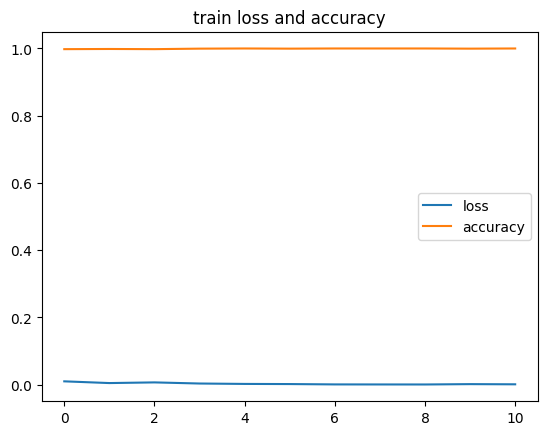

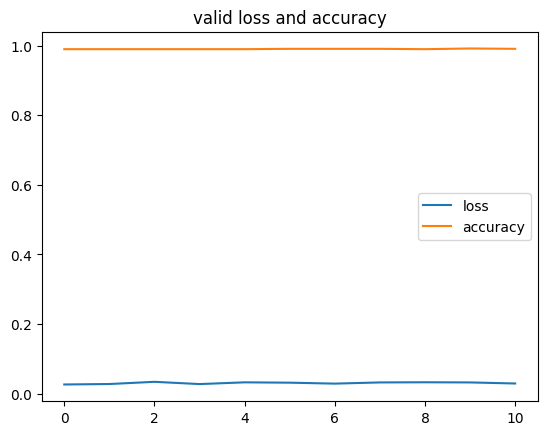

In [95]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

LR = 0.00001
EPOCHS = 25
# 손실함수
# 신경망에 sigmoid를 썼으므로 BCELoss()사용
# 만약 신경망에 softmax를 썼다면 CrossEntropyLoss()사용
criterion = torch.nn.CrossEntropyLoss().to(device)
# optimizer정의
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# scheduler 추가
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# 학습
fit(model, criterion, optimizer, EPOCHS, train_loader, valid_loader, resume=False)

In [140]:
import matplotlib.pyplot as plt
from PIL import Image

# 테스트 데이터에서 성능을 평가하고, 예측이 잘못된 이미지를 시각화하는 함수
def evaluate_and_visualize(model, test_loader, criterion):
    test_loss = 0
    test_correct = 0
    test_total = 0
    #incorrect_images = []
    incorrect_labels = []
    incorrect_preds = []
    incorrect_filenames = []

    model.eval()
    with torch.no_grad():
        for test_x, test_y, filenames in tqdm(test_loader):
            test_x, test_y = test_x.to(device), test_y.to(device)
            outputs = model(test_x)
            loss = criterion(outputs, test_y)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            # 정확도 계산
            test_correct += (predicted == test_y).sum().item()
            test_total += test_y.size(0)

            if predicted != test_y:
                incorrect_labels.append(test_y.cpu().numpy())
                incorrect_preds.append(predicted.cpu().numpy())
                incorrect_filenames.append(filenames[0])

    test_accuracy = test_correct / test_total
    print("test_correct:{}, test_total:{}".format(test_correct, test_total))
    print(f'Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_accuracy * 100:.2f}%')

    print(len(incorrect_filenames))

    # 예측이 잘못된 이미지 시각화
    fig = plt.figure(figsize=(12, 12))
    for i in range(min(16, len(incorrect_filenames))):
        ax = fig.add_subplot(4, 4, i + 1)
        image = Image.open(incorrect_filenames[i])
        ax.imshow(image)
        true_label = 'dog' if incorrect_labels[i] == 1 else 'cat'
        pred_label = 'dog' if incorrect_preds[i] == 1 else 'cat'
        filename = os.path.basename(incorrect_filenames[i])
        ax.set_title(f'Pred: {pred_label}, Label: {true_label}, {filename}', fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

100%|██████████| 1000/1000 [00:11<00:00, 89.17it/s]


test_correct:995, test_total:1000
Test Loss: 0.0244, Test Accuracy: 99.50%
5


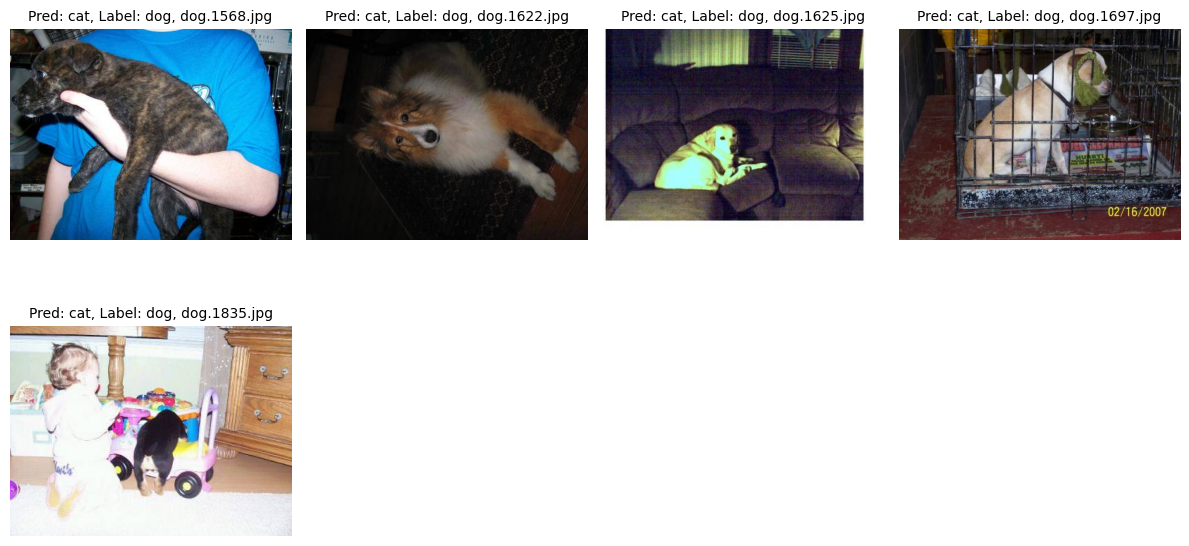

In [141]:
# 테스트 데이터를 통해 성능 평가 및 잘못된 예측 시각화
evaluate_and_visualize(model, test_loader, criterion)